In [27]:
# Adjecency Matrix
import numpy as np

# Define the adjacency matrixx
adjacency_matrix = np.array ([[0, 1, 0, 0],
                              [0, 0, 1, 0],
                              [0, 1, 0, 1],
                              [1, 0, 1, 0]])

# Set the damping factor
damping_factor = 0.85

# Initialize the PageRank values
num_pages = len(adjacency_matrix)
page_rank = np.ones(num_pages) / num_pages

# Number of iterations
num_iterations = 100

for i in range(num_iterations):
  new_page_rank = np.zeros(num_pages)
  for j in range(num_pages):
    # Calculate the PageRank contribution from each linking page
    linking_pages = [k for k in range(num_pages) if adjacency_matrix[k, j] == 1]
    for linking_page in linking_pages:
      new_page_rank[j] += page_rank[linking_page] / sum(adjacency_matrix[linking_page, :])
    new_page_rank[j] = damping_factor * new_page_rank[j] + (1 - damping_factor) / num_pages
  page_rank = new_page_rank

#  Print the final PageRank values
for page, rank in enumerate(page_rank):
  print(f"PR(Page {page + 1}) = {rank:.3f}")

PR(Page 1) = 0.122
PR(Page 2) = 0.302
PR(Page 3) = 0.378
PR(Page 4) = 0.198


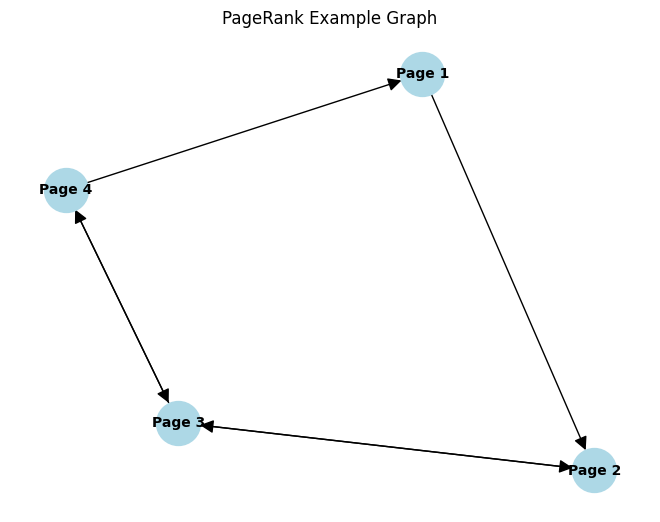

In [25]:
# Membuat Graph dari Adjacency Matrix
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define the adjacency matrix
adjacency_matrix = np.array ([[0, 1, 0, 0],
                              [0, 0, 1, 0],
                              [0, 1, 0, 1],
                              [1, 0, 1, 0]])

# Create a directed graph
G = nx.DiGraph()

# Add nodes
num_pages = len(adjacency_matrix)
G.add_nodes_from(range(num_pages))

# Add edges based on the adjacency matrix
for i in range(num_pages):
  for j in range(num_pages):
    if adjacency_matrix[i, j] == 1:
      G.add_edge(i, j)

# Draw the graph
pos = nx.spring_layout(G) # Layout the graph
labels = {i: f"Page {i+1}" for i in range(num_pages)}
nx.draw(G, pos, with_labels=True, labels=labels, node_size=1000, node_color='lightblue', font_size=10, font_color="black", font_weight="bold", arrowsize=20)
plt.title("PageRank Example Graph")
plt.show()

In [41]:
# Latihan

def PageRank(array):
  # Latihan
  adjacency_matrix = np.array (array)

  # Set the damping factor
  damping_factor = 0.85

  # Initialize the PageRank values
  num_pages = len(adjacency_matrix)
  page_rank = np.ones(num_pages) / num_pages

  # Number of iterations
  num_iterations = 100

  for i in range(num_iterations):
    new_page_rank = np.zeros(num_pages)
    for j in range(num_pages):
      # Calculate the PageRank contribution from each linking page
      linking_pages = [k for k in range(num_pages) if adjacency_matrix[k, j] == 1]
      for linking_page in linking_pages:
        new_page_rank[j] += page_rank[linking_page] / sum(adjacency_matrix[linking_page, :])
      new_page_rank[j] = damping_factor * new_page_rank[j] + (1 - damping_factor) / num_pages
    page_rank = new_page_rank

  #  Print the final PageRank values
  for page, rank in enumerate(page_rank):
    print(f"PR(Page {page + 1}) = {rank:.3f}")

In [42]:
matrix = [[0, 1, 0, 0, 1],
          [1, 0, 1, 1, 1],
          [0, 1, 0, 1, 0],
          [0, 1, 1, 0, 1],
          [1, 1, 0, 1, 0]]

PageRank(matrix)

PR(Page 1) = 0.149
PR(Page 2) = 0.277
PR(Page 3) = 0.149
PR(Page 4) = 0.212
PR(Page 5) = 0.212


In [39]:
# Latihan

def GraphAdjacencyMatrix(array):
  # Define the adjacency matrix
  adjacency_matrix = np.array (array)

  # Create a directed graph
  G = nx.DiGraph()

  # Add nodes
  num_pages = len(adjacency_matrix)
  G.add_nodes_from(range(num_pages))

  # Add edges based on the adjacency matrix
  for i in range(num_pages):
    for j in range(num_pages):
      if adjacency_matrix[i, j] == 1:
        G.add_edge(i, j)

  # Draw the graph
  pos = nx.spring_layout(G) # Layout the graph
  labels = {i: f"Page {i+1}" for i in range(num_pages)}
  nx.draw(G, pos, with_labels=True, labels=labels, node_size=1000, node_color='lightblue', font_size=10, font_color="black", font_weight="bold", arrowsize=20)
  plt.title("PageRank Graph")
  plt.show()

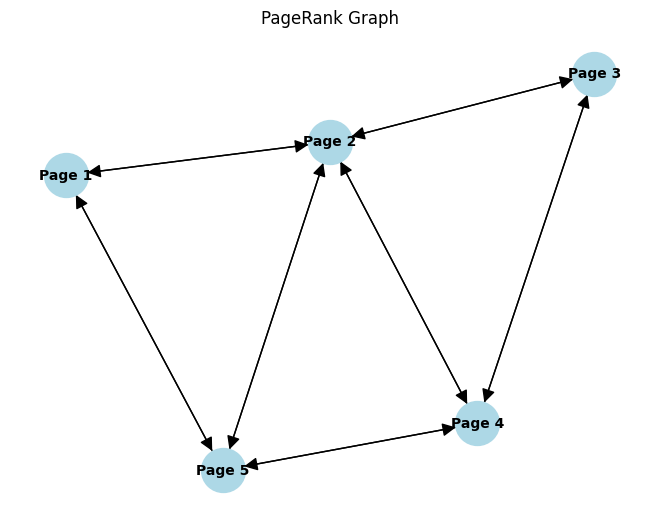

In [40]:
matrix = [[0, 1, 0, 0, 1],
          [1, 0, 1, 1, 1],
          [0, 1, 0, 1, 0],
          [0, 1, 1, 0, 1],
          [1, 1, 0, 1, 0]]

GraphAdjacencyMatrix(matrix)

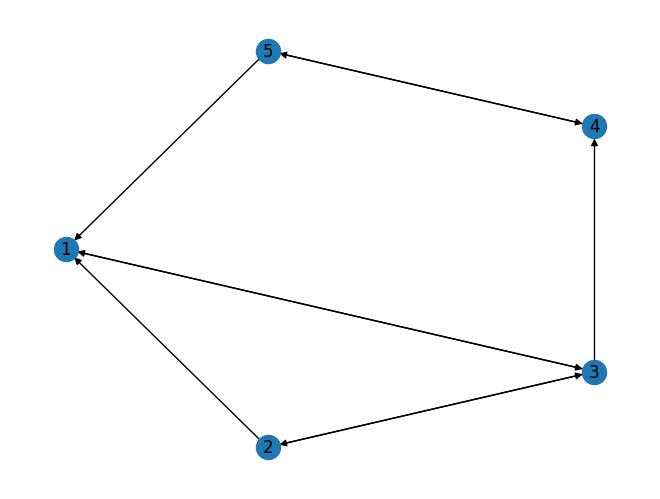

In [46]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

myWeb = nx.DiGraph()
myPages = range(1, 5)

connections = [(1, 3), (2, 1), (2, 3), (3, 1), (3, 2), (3, 4), (4, 5), (5, 1), (5, 4)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)

pos = nx.shell_layout(myWeb)
nx.draw(myWeb, pos, arrows=True, with_labels=True)
plt.show()

In [43]:
import networkx as nx
import numpy as np

def CreatePageRank(aGraph):
  nodes_set = len(aGraph)
  M = nx.to_numpy_array(aGraph) # Menggunakan metode to_numpy_array
  outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
  prob_outwards = np.array(1.0 / outwards)
  G = np.multiply(M, prob_outwards[:, np.newaxis])

  p = np.ones(nodes_set) / float(nodes_set)
  return G, p

# Contoh penggunaan:
myWeb = nx.DiGraph()
connections = [(1, 3), (2, 1), (2, 3), (3, 1), (3, 2), (3, 4), (4, 5), (5, 1), (5, 4)]
myWeb.add_edges_from(connections)

G, p = CreatePageRank(myWeb)
print(G)

[[0.         1.         0.         0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333 0.        ]
 [0.5        0.5        0.         0.         0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.5        0.         0.         0.5        0.        ]]


In [44]:
import numpy as np

# Matriks adjacency (0 berarti tidak ada atutan, 1 berarti ada tautan)
adjacency_matrix = np.array([[0, 1, 1, 1, 0],
                              [0, 0, 1, 0, 0],
                              [1, 0, 0, 0, 0],
                              [0, 0, 1, 0, 1],
                              [0, 0, 1, 1, 0]])

# Inisialisasi nilai awal PageRank
pagerank = np.array([1, 1, 1, 1, 1], dtype=float)

# Faktor damping
damping_factor = 0.85

# Jumlah iterasi
num_iterations = 100

for _ in range(num_iterations):
  # Inisialisasi PageRank baru
  new_pagerank = np.zeros(pagerank.shape, dtype=float)

  for i in range(adjacency_matrix.shape[0]):
    for j in range(adjacency_matrix.shape[1]):
      # Hitung jumlah tautan keluar dari halaman i
      num_outlinks = np.sum(adjacency_matrix[i, :])

      # Perbarui PageRank berdasarkan rumus PageRank
      if num_outlinks > 0:
        new_pagerank[j] += (damping_factor * pagerank[i] / num_outlinks)

  # Normaliasasi PageRank
  new_pagerank += (1 - damping_factor) / len(pagerank)

  # Perbarui nilai PageRank
  pagerank = new_pagerank

# Hasil PageRank
print("Hasil PageRank:")
print(pagerank)

Hasil PageRank:
[1.72510772e+45 1.72510772e+45 1.72510772e+45 1.72510772e+45
 1.72510772e+45]


In [49]:
import numpy as np

# Jumlah halaman
num_pages = 5

# Vectors of outlinks
outlinks = np.array([3, 2, 1, 2, 2])

# Vectors of inlinks
inlinks = np.array([1, 2, 1, 2, 1])

# Inisialisasi nilai awal PageRank
pagerank = np.ones(num_pages, dtype=float) / num_pages

# Faktor damping
damping_factor = 0.85

# Jumlah iterasi
num_iterations = 100

for _ in range(num_iterations):
  # Inisialisasi PageRank baru
  new_pagerank = np.zeros(num_pages, dtype=float)

  for i in range(num_pages):
    for j in range(num_pages):
      if i != j and outlinks[j] > 0:
        new_pagerank[i] += damping_factor * (pagerank[j] / outlinks[j])

  # Terapkan faktor damping dan tambahkan nilai konstan
  pagerank = (1 - damping_factor) / num_pages + new_pagerank

# Hasil PageRank
print("Hasil PageRank:")
for i, pr in enumerate(pagerank):
  print(f"Halaman {chr(ord('A') + i)}: {pr:.4f}")

Hasil PageRank:
Halaman A: 379781916076663755421777920.0000
Halaman B: 356329657326501560173199360.0000
Halaman C: 300635253803169860934434816.0000
Halaman D: 356329657326501628892676096.0000
Halaman E: 356329657326501628892676096.0000


In [60]:
# Latihan 1
matrix1 = [[0, 1, 0, 0, 0, 0],
          [0, 0, 1, 0, 0, 0],
          [0, 0, 0, 1, 0, 0],
          [0, 0, 0, 0, 1, 0],
          [0, 0, 0, 0, 0, 1],
          [0, 0, 0, 0, 0, 0]]

connections1 = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6)]

PageRank(matrix1)

PR(Page 1) = 0.025
PR(Page 2) = 0.046
PR(Page 3) = 0.064
PR(Page 4) = 0.080
PR(Page 5) = 0.093
PR(Page 6) = 0.104


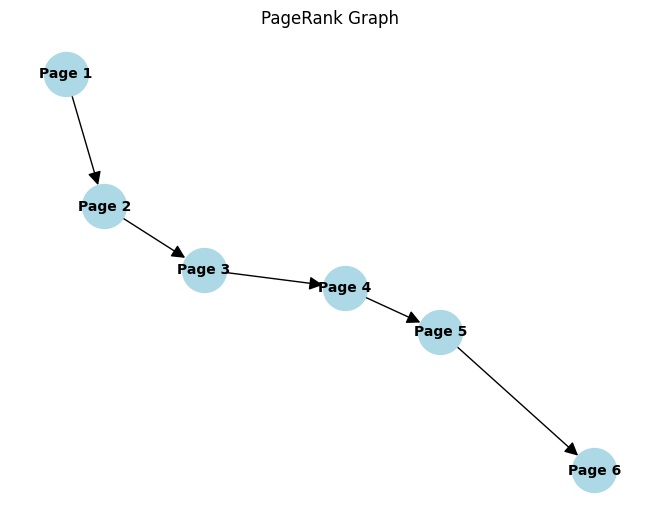

In [61]:
# Latihan 1
GraphAdjacencyMatrix(matrix1)

In [56]:
# Latihan 2
matrix2 = [[0, 1, 0, 0, 0],
          [0, 0, 1, 0, 0],
          [0, 0, 0, 1, 0],
          [0, 0, 0, 0, 1],
          [1, 0, 0, 0, 0]]

connections2 = [(1, 2), (2, 1), (2, 3), (3, 2), (3, 4), (4, 3)]

PageRank(matrix2)

PR(Page 1) = 0.200
PR(Page 2) = 0.200
PR(Page 3) = 0.200
PR(Page 4) = 0.200
PR(Page 5) = 0.200


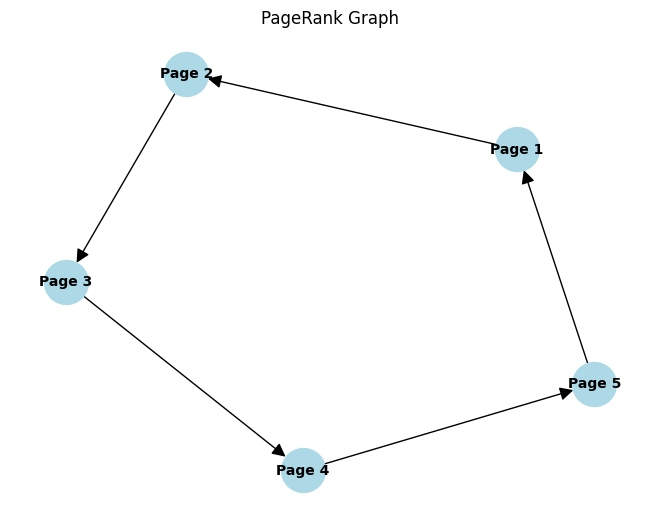

In [57]:
# Latihan 2
GraphAdjacencyMatrix(matrix2)

In [62]:
# Latihan 3
matrix3 = [[0, 1, 0, 0],
          [1, 0, 1, 0],
          [0, 1, 0, 1],
          [0, 0, 1, 0]]

connections3 = [(1, 2), (2, 1), (2, 3), (3, 2), (3, 4), (4, 3)]

PageRank(matrix3)

PR(Page 1) = 0.175
PR(Page 2) = 0.325
PR(Page 3) = 0.325
PR(Page 4) = 0.175


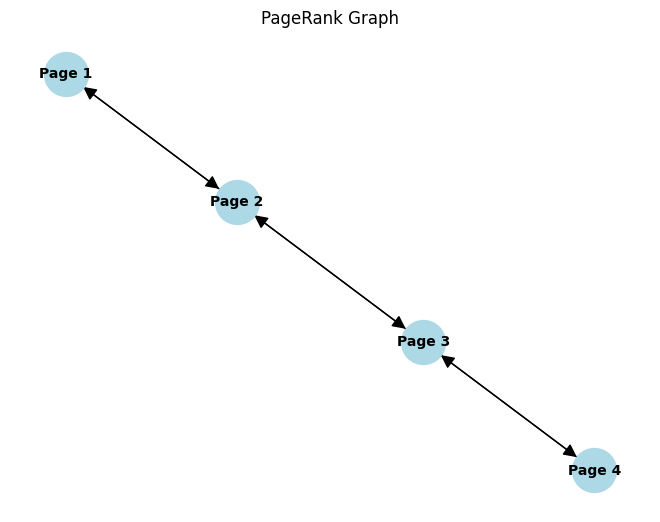

In [63]:
# Latihan 3
GraphAdjacencyMatrix(matrix3)

In [65]:
# Latihan 4
matrix4 = [[0, 1, 0, 0, 0, 0],
          [0, 0, 1, 0, 0, 0],
          [0, 0, 0, 1, 0, 0],
          [0, 0, 0, 0, 1, 0],
          [0, 0, 0, 0, 0, 1],
          [1, 0, 0, 0, 0, 0]]

connections4 = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 1)]

PageRank(matrix4)

PR(Page 1) = 0.167
PR(Page 2) = 0.167
PR(Page 3) = 0.167
PR(Page 4) = 0.167
PR(Page 5) = 0.167
PR(Page 6) = 0.167


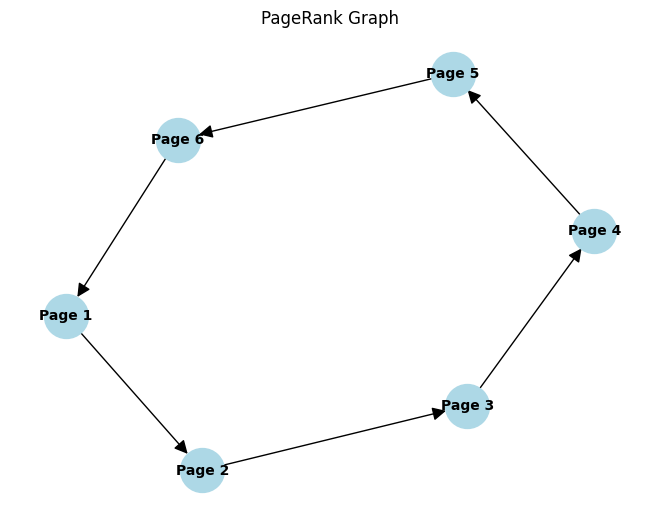

In [66]:
# Latihan 4
GraphAdjacencyMatrix(matrix4)

In [68]:
# Latihan 5
matrix5 = [[0, 1, 0, 0],
          [1, 0, 1, 0],
          [0, 1, 0, 1],
          [1, 0, 1, 0]]

connections5 = [(1, 2), (2, 1), (2, 3), (3, 2), (3, 4), (4, 3), (4, 1)]

PageRank(matrix5)

PR(Page 1) = 0.250
PR(Page 2) = 0.356
PR(Page 3) = 0.250
PR(Page 4) = 0.144


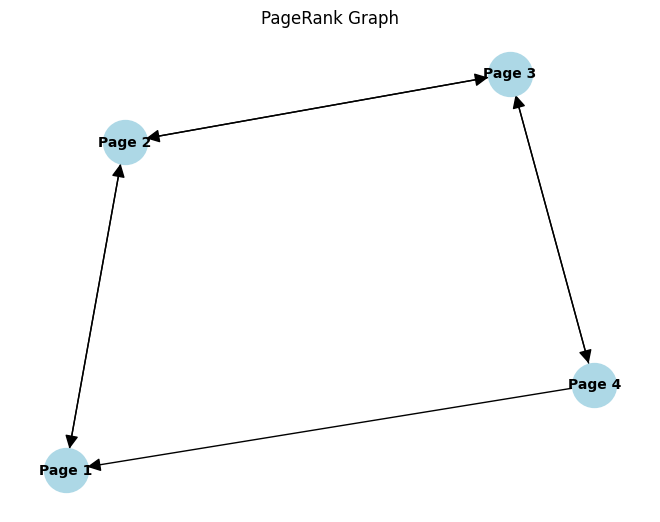

In [69]:
# Latihan 5
GraphAdjacencyMatrix(matrix5)

In [72]:
# Latihan 6
matrix6 = [[0, 1, 0, 0, 0],
          [0, 0, 1, 0, 0],
          [0, 0, 0, 1, 0],
          [1, 0, 0, 0, 1],
          [1, 0, 0, 0, 0]]

connections6 = [(1, 2), (2, 3), (3, 4), (4, 1), (4, 5), (5, 1)]

PageRank(matrix6)

PR(Page 1) = 0.225
PR(Page 2) = 0.221
PR(Page 3) = 0.218
PR(Page 4) = 0.215
PR(Page 5) = 0.121


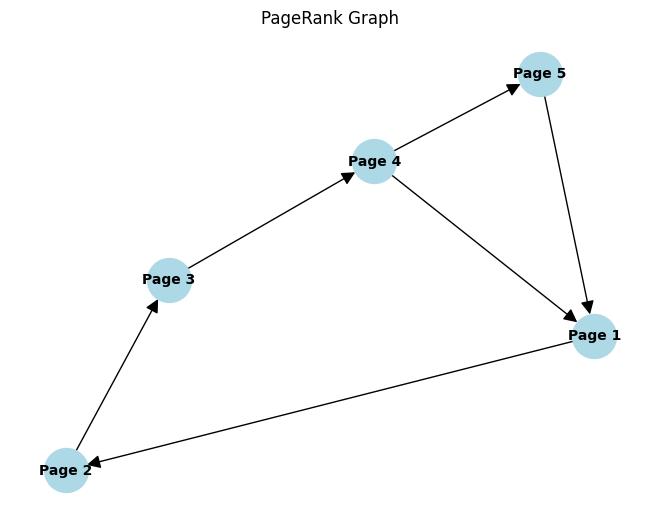

In [73]:
# Latihan 6
GraphAdjacencyMatrix(matrix6)

In [74]:
# Latihan 7
matrix7 = [[0, 1, 0, 1],
          [1, 0, 1, 1],
          [0, 1, 0, 1],
          [1, 0, 1, 0]]

connections7 = [(1, 2), (1, 4), (2, 1), (2, 3), (2, 4), (3, 2), (3, 4), (4, 1), (4, 3)]

PageRank(matrix7)

PR(Page 1) = 0.232
PR(Page 2) = 0.235
PR(Page 3) = 0.232
PR(Page 4) = 0.301


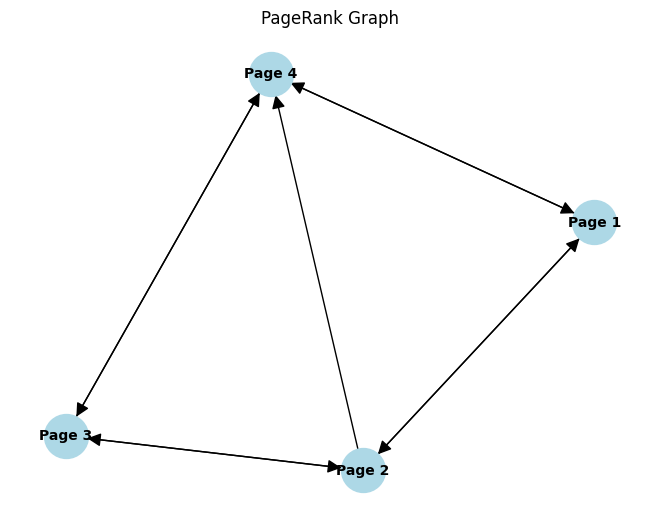

In [75]:
GraphAdjacencyMatrix(matrix7)

Penerapan algoritma PageRank dalam kehidupan manusia dapat memberikan manfaat dalam berbagai aspek sosial. Berikut adalah beberapa aplikasinya:

1. Identifikasi Opini Pemimpin: PageRank dapat membantu mengidentifikasi individu atau kelompok yang memiliki pengaruh sosial yang kuat dalam masyarakat, membantu memandu upaya komunikasi dan kampanye sosial.

2. Penyebaran Informasi Kesehatan: Algoritma PageRank dapat digunakan untuk memahami penyebaran informasi kesehatan dalam masyarakat, membantu menyebarkan pesan-pesan penting.

3. Pengelolaan Sumber Daya Alam dan Lingkungan: PageRank dapat digunakan untuk mengidentifikasi wilayah yang penting dalam pengelolaan lingkungan dan sumber daya alam.